# Navier-Stokes simulation in 2D
Currently only the simulation of a pressure driven lid is possible. This can be extended by adding more possibilities to the function 'set_BC'.

In [ ]:
#%matplotlib notebook
import time
import numpy as np
import scipy as sci

from types import SimpleNamespace

from functions import *
from constants import *
from simulation import *

start_time = time.time()

# Initial conditions 
const = SimpleNamespace()

const.Re = 1e2      # Reynolds number
const.dt = 1e-2     # time step
const.tf = 4e0      # final time
const.nx = 50       # number of x-gridpoints
const.ny = 50       # number of y-gridpoints
const.nsteps = 10   # step interval for graphic output
const.lx = 1        # width of box
const.ly = 1        # height of box
    
const.rho_arrow = 20 # Density of arrows in quiver plot per unit length l

## Set other constants (incl. grid) which are determined by initial conditions specified above
const = constants(const)

# IC's
data = SimpleNamespace()
data = initialisation(const, data)

# BC's
## North, East, South, West
bc = SimpleNamespace()
bc = set_BC(const, bc, 'lid')

# Boundary matrices
const.Ubc , const.Vbc = set_BM(const, bc) # Maybe change const. to bc.

# Operator matrices on P, U, V, Q respectively
LP = SimpleNamespace()
LP = laplacian(const, LP)
LP = cholesky_decomposition(LP)

# Simulation
simulation_data = simulation(const, bc, LP, data)

end_time = time.time()
print('Runtime', np.round(end_time - start_time,2), 's')

# Preliminary object function

In [ ]:
np.shape(data.V)

In [ ]:
# Circular object
scale = 1/5
R = const.lx*scale/2
cx, cy = const.lx/2, const.ly/2

indices_Pgrid = ((const.X_ave-cx)**2 /3 + (const.Y_ave-cy)**2 <= R**2) # devided by three to see clear differences later on # The object is projected on the pressure grid (grid points in middle of cell)
indices_grid = ((const.X-cx)**2 + (const.Y-cy)**2 <= R**2)


In [ ]:
indices_Ugrid = np.zeros((np.shape(data.U)), dtype=bool)
indices_Vgrid = np.zeros((np.shape(data.V)), dtype=bool)

# Firstly shape[1] as this is the x-coordinate and shape[0] secondly as this is the y-coordinate
# range starts at 1 in order to prevent looking to non-existent elements. (Here it is okay to start from 1 for both x and y as the object is not at the boundary of the domain)
for x in range(1, np.shape(indices_Pgrid)[1]):
    for y in range(1, np.shape(indices_Pgrid)[0]):
        if indices_Pgrid[y,x]:
            if indices_Pgrid[y, x-1]:
                indices_Ugrid[y, x] = True
            if indices_Pgrid[y+1, x]:
                indices_Vgrid[y, x] = True # Indices kloppen hier nog niet
visualise_matrix(indices_Ugrid, 'Ugrid')
visualise_matrix(indices_Vgrid, 'Vgrid')

In [55]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` (mapping the normed scalar to a color).
    
    cm

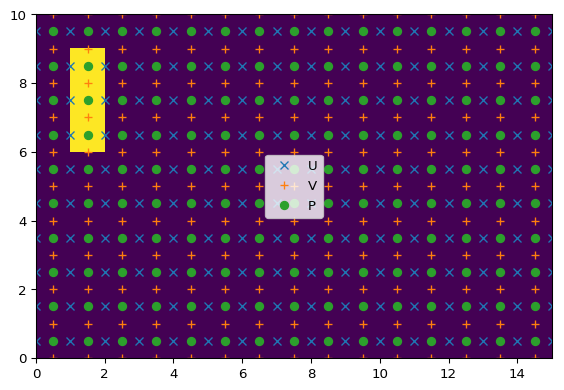

In [90]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
xL = 15

y0 = 0
yL = 10

O = np.zeros((xL, yL), dtype=float)
O[1:2, 1:4] = 16

u_x = np.arange(x0, xL+1, 1)
u_y = np.arange(y0+0.5, yL+0.5, 1)
[X_u, Y_u] = np.meshgrid(u_x, u_y)

v_x = np.arange(x0+0.5, xL+0.5, 1)
v_y = np.arange(y0, yL+1, 1)
[X_v, Y_v] = np.meshgrid(v_x, v_y)

p_x = np.arange(x0+0.5, xL + 0.5, 1)
p_y = np.arange(y0+0.5, yL + 0.5, 1)
[X_p, Y_p] = np.meshgrid(p_x, p_y)

my_dpi = 96
plt.figure(figsize=(xL*40/my_dpi, yL*40/my_dpi), dpi=my_dpi)
plt.plot(np.reshape(X_u, (-1,)), np.reshape(Y_u, (-1,)), 'x', label='U')
plt.plot(np.reshape(X_v, (-1,)), np.reshape(Y_v, (-1,)), '+', label='V')
plt.plot(np.reshape(X_p, (-1,)), np.reshape(Y_p, (-1,)), 'o', label='P')
plt.legend()
plt.imshow(O.T, extent=[x0, xL, y0, yL])
plt.tight_layout()
plt.show()



In [ ]:
# Visual check of object
'''
indices_Pgrid = indices_Pgrid*1
indices_Pgrid[6,8] = 10
indices_Pgrid[6,7] = 20

indices_Pgrid[10,20] = 10
indices_Pgrid[9,20] = 20
'''
visualise_matrix(indices_Pgrid,'indices_Pgrid')
visualise_matrix(indices_grid,'indices_grid')

# Visual representation of grid
visualise_matrix((const.X_ave-cx)**2 + (const.Y_ave-cy)**2,'Translated Pgrid')
visualise_matrix((const.X_ave)**2 + (const.Y_ave)**2,'Original Pgrid')

visualise_matrix((const.X-cx)**2 + (const.Y-cy)**2,'Translated grid')
visualise_matrix((const.X)**2 + (const.Y)**2,'Original grid')